## This optimization project is elaborated by :  Montassar MHAMDI           2022/2023 





# **The details and the observations are provided in the report.**

## Outline :

- [Overview](#0)
- [Part 1: Exploratory Data Analysis](#1)
    - [1.1 Import Dataset](#1.1)
    - [1.2 Exploration](#1.2)
- [Part 2: Gradient Descent](#2)
    - [2.1 Logistic Regression GD for classification](#2.1)
    - [2.2 Step Size](#2.2)
    - [2.3 Convergence Rate](#2.2)
    - [2.4 Performance Test Set (change the RIDGE penalty)](#2.4)
- [Part 3: Automatic Differentiation](#3)
- [Part 4: Stochtastic Gradient Descent](#4)
    - [4.1 SGD and Comparison with GD](#4.1)
    - [4.2 Optimal Batch Size](#4.2)
    - [4.3 SVRG](#4.3)
- [Part 5: Convexity and Constrained Optimization](#5)
    - [5.1 Conditional Gradient Algorithm](#5.1)
    - [5.2 Projected Gradient Optimization](#5.2)
- [Part 6: Regularization](#6)
    - [6.1 L-1 Regularization : LASSO](#6.1)
    - [6.2 L-2 Regularization](#6.2)
- [Part 7: Large-Scale and Distributed Optimization](#7)
    - [7.1  Randomized Block Coordinate Descent](#7.1)
    - [7.2  Randomized Block Coordinate Descent + SGD](#7.2)
- [Part 8: Advanced Topics On Gradient Descent](#8)
    - [8.1  Heavy Ball](#8.1)
    - [8.2  Add Non-Convex Penalty to the loss (L-0.5 penalty) + GD](#8.2)

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.colors as pltcolors
from sklearn import linear_model, svm, discriminant_analysis, metrics
from scipy import optimize
import seaborn as sns

In [2]:
plt.style.use('ggplot')

<a name='1'></a>
# Part 1: Exploratory Data Analysis

<a name='1.1'></a>
### 1.1 Import Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
data_path = '/content/drive/MyDrive/optim_project/diabetes.csv'

<a name='1.2'></a>
### 1.2 Exploration

In [5]:
data = pd.read_csv(data_path, sep=',')

In [6]:
data.shape

(768, 9)

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data['Outcome'].value_counts() 

0    500
1    268
Name: Outcome, dtype: int64

<Figure size 432x432 with 0 Axes>

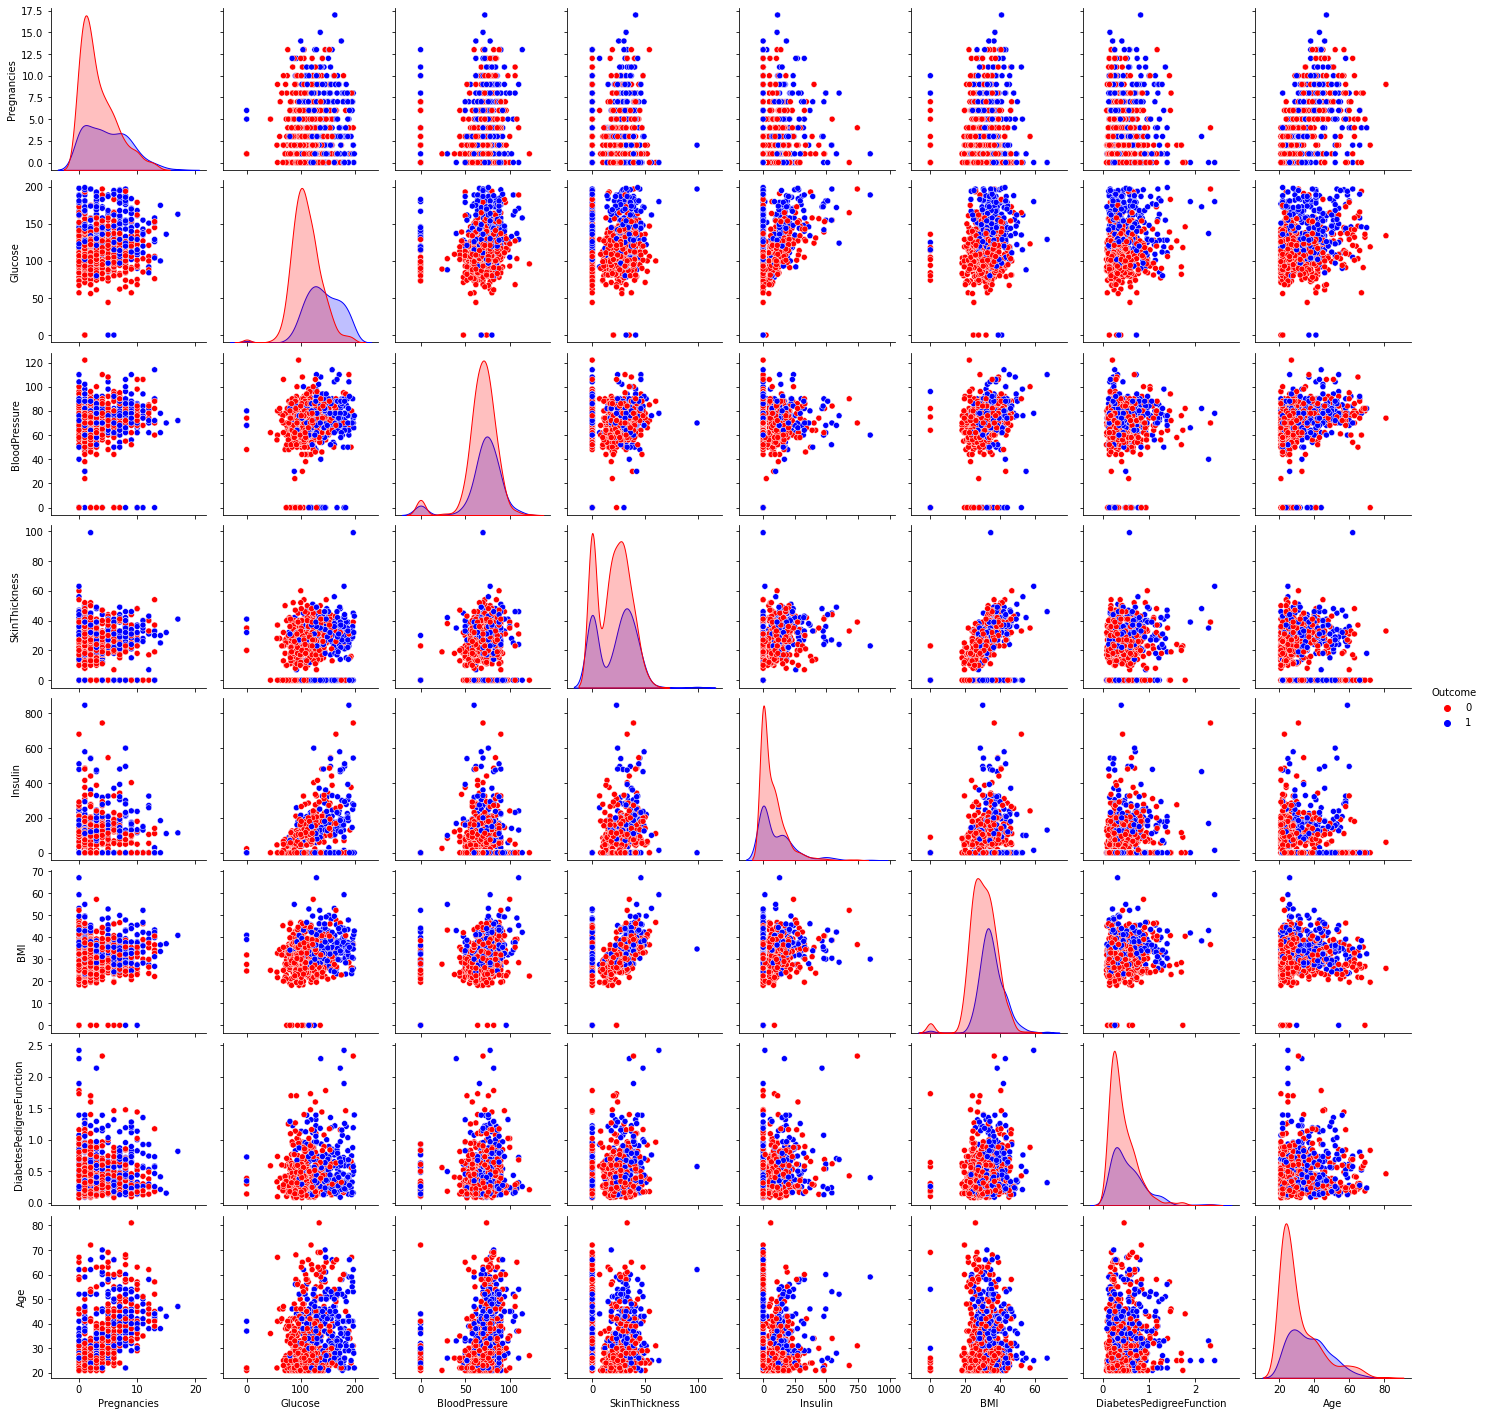

In [ ]:
plt.figure(figsize=(6,6))
sns.pairplot(data, hue='Outcome', palette =['red','blue'])
plt.show()

**Observations** :   
  - From scatter plots, to me only BMI, SkinThickness, Pregnancies ,Age
seem to have positive linear relationships. Another likely suspect is
Glucose and Insulin.
  - There are no non-linear relationships.

**Split train and test sets**





In [7]:
data_copy = data.copy()
data_train = data.sample(n=600, random_state=42)
data_test = data_copy.drop(data_train.index)

**Normalization step**

In [8]:
numerical_data = data_train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] 
A = numerical_data.values
numerical_data1 = data_test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
A1 = numerical_data1.values

In [9]:
mA = A.mean(axis=0)
sA = A.std(axis=0)
A = (A-mA)/sA
A1 = (A1-mA)/sA

In [10]:
y = data_train['Outcome'].values
y1 = data_test['Outcome'].values

**Features Correlation**

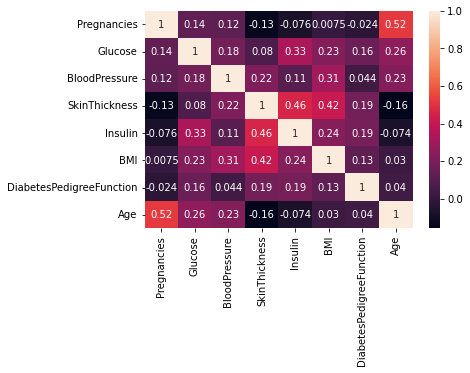

In [ ]:
corrMatrix = numerical_data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

From the plot above, attributes are not highly correlated between them ; but Daily Internet Usage is a bit strongly and positively correlated with daily time on site, then secondly comes the area income which is positively correlated with Daily Internet Usage as well as Daily time spent on site.

**Compute PCA**

In [11]:
U, s, V = np.linalg.svd(A)
Ar = A.dot( V.transpose() ) 

**SQRT of the eigen values**

Text(0.5, 1.0, 'Square root of eignevalues of A.T * A')

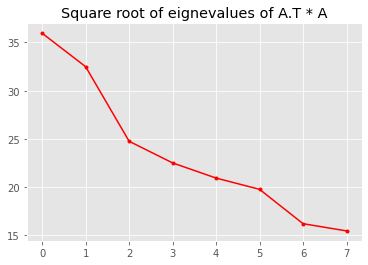

In [12]:
plt.plot(s, '.-', color='r')
plt.title("Square root of eignevalues of A.T * A")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


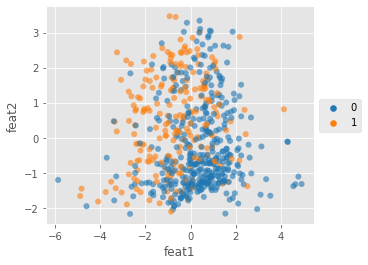

In [13]:
df = pd.DataFrame(Ar[:,0:2], columns=['feat1', 'feat2'])
df['Outcome'] = y
ax = sns.scatterplot('feat1', 'feat2', data=df, palette='tab10', hue='Outcome', linewidth=0, alpha=0.6)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

**Explained Variance**

In [ ]:
(np.cumsum(s**2)/np.sum(s**2)*100)[1]

48.905056537682526

In [ ]:
(np.cumsum(s**2)/np.sum(s**2)*100)[2]

61.67508468883929

**3D scattered plot of reduced dimensions**

In [ ]:
import plotly.express as px

In [ ]:
transformed_encodings = pd.DataFrame(Ar[:,0:3], columns=[0, 1, 2])
transformed_encodings['Outcome'] = list(map(str,y))
fig = px.scatter_3d(transformed_encodings, x=0, y=1, z=2, color=transformed_encodings['Outcome'], labels={'0': 'feat 1', '1': 'feat 2', '2': 'feat 3'})
fig.show()

Regarding the 3D projection retrieved by PCA, the data looks simple. It seems that the two classes are even almost linearly separable..


# Problem Setting

**Given train data A and train labels y, y being labels of examples in A , y in  {0,1} , we try to optimze parameters with different algorithms to map A to y. We are going to test the generalization capacity of the model on test data A1 and test labels y1**

In [ ]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/optim_project/')

In [ ]:
import unconstrained_optimizers._base as uncon

<a name='2'></a>
# Part 2: Gradient Descent

<a name='2.1'></a>
### 2.1 Logistic regression with GD for classification


To ensure theoretically the converence, Stepsize should be chosen such as : 
\begin{equation*}
\tau < \frac{2}{L}
\end{equation*}
Where :
\begin{equation}
L = \frac{||A^TA||}{4n}  
\end{equation}
is a Lipschitz constant for $\nabla f$ when there is no regularization and n is the nimber of samples.

**Max τ value :**

In [ ]:
n = A.shape[0]
L = np.linalg.norm(A, ord=2) ** 2 / (4. * n) 
tau_max = 2/L
print('tau_max',2/L)

tau_max 3.714163441963732


In [ ]:
tau = 1/(L)
niter = 100
lbda = 0
change = 0
inference = False
x,cost_values1,gd = uncon.gradient_descent(A,y,tau,niter,lbda,A1,y1,change,inference)

In [ ]:
print("The optimal learning rate :")
tau

The optimal learning rate :


1.857081720981866

**Loss and Gradient norm plots**

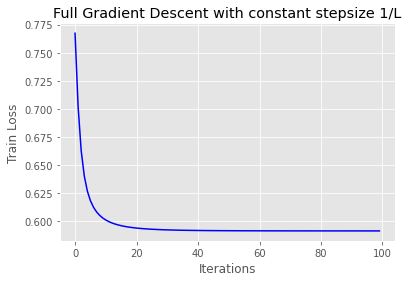

In [ ]:
plt.plot(range(niter),cost_values1, color = 'blue')
plt.title('Full Gradient Descent with constant stepsize 1/L')
plt.xlabel("Iterations")
plt.ylabel('Train Loss')
plt.show()

The Gradient descent algorithm starts converging within 30 iterations. Let's check if the gradients are becoming close to 0.

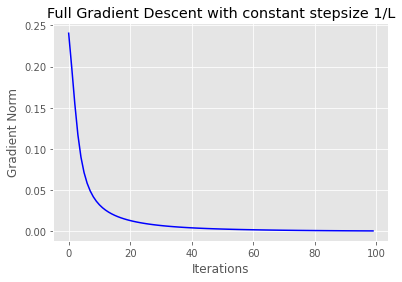

In [ ]:
plt.plot(range(niter),gd, color = 'blue')
plt.title('Full Gradient Descent with constant stepsize 1/L')
plt.xlabel("Iterations")
plt.ylabel('Gradient Norm')
plt.show()

<a name='2.2'></a>
### 2.2 Step Size 

**Step size choice : Learning rate**

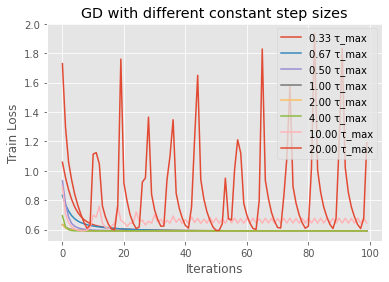

In [ ]:
tau_values = [1/3 * tau_max, 2/3 * tau_max, tau_max/2, tau_max, 2* tau_max, 4*tau_max, 10*tau_max, 20* tau_max]
niter = 100
lbda = 0
change = 0
inference = False
for tau in tau_values :
    x,cost_values,_ = uncon.gradient_descent(A,y,tau,niter,lbda,A1,y1,change,inference)
    plt.plot(range(niter),cost_values, label=str("{:.2f} τ_max".format(tau/tau_max)))
    plt.title('GD with different constant step sizes')
    plt.xlabel("Iterations")
    plt.ylabel('Train Loss')
    plt.legend()
plt.show()

This plot shows that as we increase the stepsize, the loss drops more rapidly. However, if we use a stepsize higher than tau_max = 2/L, we don't have theoretical garantees of convergence. In the case of this simple dataset, the algorithm still converges

<a name='2.3'></a>
### 2.3 Convergence Rate

**Convergence rate**

<ipython-input-32-4da532490592>:8: RuntimeWarning:

divide by zero encountered in log10

<ipython-input-32-4da532490592>:8: RuntimeWarning:

divide by zero encountered in log10



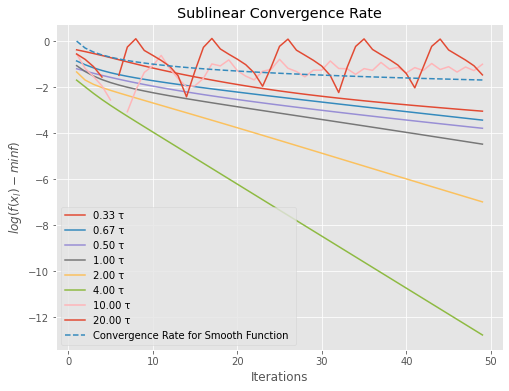

In [ ]:
tau_values =  [1/3 * tau_max, 2/3 * tau_max, tau_max/2, tau_max, 2* tau_max, 4*tau_max, 10*tau_max, 20* tau_max]
niter = 100
ndisp = int(niter/2)
change = 0
inference = False
lbda = 0
fig = plt.figure(figsize=(8, 6))
for tau in tau_values :
    x,cost_values,_ = uncon.gradient_descent(A,y,tau,niter,lbda,A1,y1,change,inference)
    plt.plot(np.arange(1,ndisp), np.log10(cost_values[1:ndisp]-np.min(cost_values)), label=str("{:.2f} τ".format(tau/tau_max)))
    plt.title('Sublinear Convergence Rate')
    plt.xlabel("Iterations")
    plt.ylabel('$log(f(x_l) - min f)$')
    plt.legend()
plt.plot(np.arange(1,ndisp),np.log10(1/np.arange(1,ndisp)), linestyle='dashed', label = 'Convergence Rate for Smooth Function ')
plt.legend()
plt.show()

That logistic function is a smooth function but it's not strongly convex. So the convergence rate is shown to be of $O(\frac{1}{k})$. The curves for $\tau \leq \tau_{max}$ are quite parallel to the line of the convergence rate.

<a name='2.4'></a>
### 2.4 Performance on Test Set (change the RIDGE penalty)

In [ ]:
tau = 1/(L)
niter = 100
lbda = 0.1
change = 0.1 # the variation of ridge penalty test_lambda = lbda + change
inference=True
x,cost_values,val_cost_values = uncon.gradient_descent(A,y,tau,niter,lbda,A1,y1,change,inference)

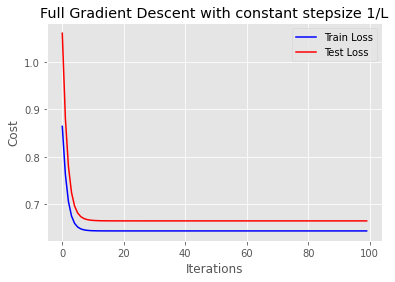

In [ ]:
plt.plot(range(niter),cost_values, color='blue', label='Train Loss')
plt.plot(range(niter),val_cost_values, color='red', label='Test Loss')
plt.title('Full Gradient Descent with constant stepsize 1/L')
plt.xlabel("Iterations")
plt.ylabel('Cost')
plt.legend()
plt.show()

The plot indicates that there is no over-fitting from our model and the test cost function decreases (from the beginning, data does not suffer from multicollinearity). 

<a name='3'></a>
# Part 3: Automatic Differentiation

**Evaluate automatic calculus chain**

In [ ]:
import automatic_differentation._base as auto_diff

In [ ]:
idx = random.randint(1, len(A))

In [ ]:
one_sample = A[idx]
label = y[idx]

**Check the result with the manual way (step by step) [ case of  number of layers = 4 ]**

In [ ]:
funcs, params = auto_diff.MLP(n=len(one_sample), y=label, seed=42, k=4) # k : number of layers 

**Architecture** 

---



In [ ]:
funcs

[<function automatic_differentiation.dot(x, W)>,
 <function automatic_differentiation.relu(x)>,
 <function automatic_differentiation.dot(x, W)>,
 <function automatic_differentiation.relu(x)>,
 <function automatic_differentiation.dot(x, W)>,
 <function automatic_differentiation.relu(x)>,
 <function automatic_differentiation.dot(x, W)>,
 <function automatic_differentiation.relu(x)>,
 <function automatic_differentiation.dot(x, W)>,
 <function automatic_differentiation.squared_loss(y_pred, y)>]

In [ ]:
print('Loss value for the random sample with chain way :')
auto_diff.evaluate_chain(one_sample, funcs, params)[0][0]

Loss value for the random sample with chain way :


1.1941291246986472

In [ ]:
 W1, _, W2, _, W3, _, W4, _, W5, gt = params #W1, _, W2, _, W3, gt = params #

In [ ]:
layer1 = auto_diff.dot(one_sample, W1) # layer 1 output
activation1 = auto_diff.relu(layer1) # activation layer 1 output
layer2 = auto_diff.dot(activation1, W2) # layer 2 output
activation2 = auto_diff.relu(layer2) # activation layer 2 output
layer3 = auto_diff.dot(activation2, W3) # layer 3 output
activation3 = auto_diff.relu(layer3) # activation layer 3 output
layer4 = auto_diff.dot(activation3, W4) # layer 4 output
activation4 = auto_diff.relu(layer4) # activation layer 4 output
out = auto_diff.dot(activation4, W5) # output layer
loss_value = 0.5 * np.sum((gt - out[0][0]) ** 2) # compute loss

In [ ]:
print('Loss value for the random sample after computing each step aside :')
loss_value

Loss value for the random sample after computing each step aside :


1.1941291246986472

**Compute gradient**

In [ ]:
L, U, J = auto_diff.backward_differntiation_chain(one_sample, funcs, params)

In [ ]:
from numpy.testing import assert_array_almost_equal

def f(W5):
  params = W1, None, W2, None, W3, None, W4, None, W5, gt
  return auto_diff.evaluate_chain(one_sample, funcs, params)

W5 = params[8]
num_jac = auto_diff.numerical_jacobian(f, W5)
assert_array_almost_equal(num_jac, J[8])
print("The check on gradient computation wrt to the 5th dense layer through backward pass and numerical jacobian is successful!")
print('-'*50)
print("Backpropagation wrt W5 : \n", J[8])
print('-'*50)
print("numerical jacobian of W5 : \n", num_jac)

The check on gradient computation wrt to the 5th dense layer through backward pass and numerical jacobian is successful!
--------------------------------------------------
Backpropagation wrt W5 : 
 [[-0.         -4.54665744 -0.43659519 -0.        ]]
--------------------------------------------------
numerical jacobian of W5 : 
 [[ 0.         -4.54665744 -0.43659519  0.        ]]


**Train and Optimization processes**

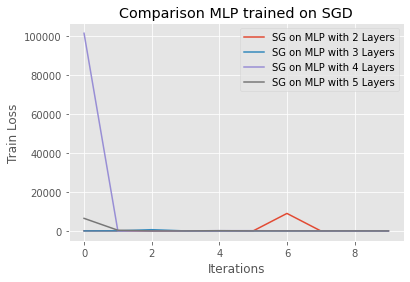

In [ ]:
n = A.shape[0]
L = np.linalg.norm(A, ord=2) ** 2 / (4. * n) 
tau = 0.0001
niter = 10
nb = 1
for k in [2, 3, 4, 5]:
    funcs, params = auto_diff.MLP(n=len(one_sample), y=label, seed=42, k=4)
    cost_values = auto_diff.train(funcs,params,A,A1,tau,niter,n,nb) 
    plt.plot(range(niter),cost_values, label= f"SG on MLP with {k} Layers")

plt.title('Comparison MLP trained on SGD')
plt.xlabel('Iterations')
plt.ylabel('Train Loss')
plt.legend()
plt.show()

<a name='4'></a>
# Part 4: Stochtastic Gradient Descent

<a name='4.1'></a>
### 4.1 SGD and Comparison with GD

In [ ]:
tau = 1/(L)
nb_epochs = 30
lbda = 0
nb = 1
n = 600
change = 0
inference = False
niter=int(nb_epochs*n/nb)
x,cost_values,gd = uncon.gradient_descent(A,y,tau,nb_epochs,lbda,A1,y1,change,inference)
x_sg,cost_values_sg = uncon.stochastic_gradient(A,tau,y,lbda,nb,niter)

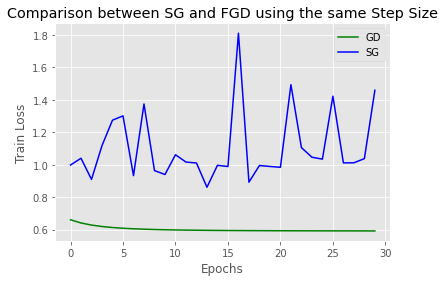

In [ ]:
plt.plot(range(nb_epochs),cost_values, color = 'green', label='GD')
plt.plot(range(nb_epochs),cost_values_sg, color = 'blue', label="SG")
plt.title('Comparison between SG and FGD using the same Step Size')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.legend()
plt.show()

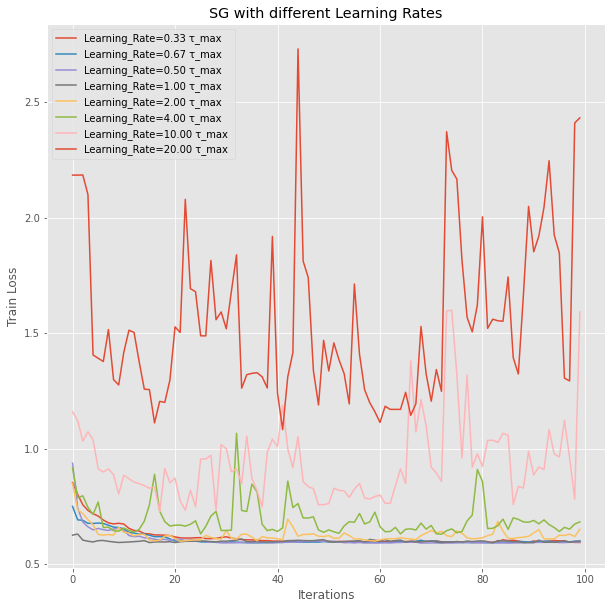

In [ ]:
tau_values =  [1/3 * tau_max, 2/3 * tau_max, tau_max/2, tau_max, 2* tau_max, 4*tau_max, 10*tau_max, 20* tau_max]
plt.figure(figsize = (10,10))
lbda = 0
size = 30
niter = 100
for tau in tau_values : 
    x,cost_values = uncon.stochastic_gradient_(A,tau,y,lbda,size,niter)
    plt.plot(range(niter),cost_values, label=f'Learning_Rate={str("{:.2f} τ_max ".format(tau/tau_max))}')
plt.title('SG with different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Train Loss')
plt.legend()
plt.show()

<a name='4.2'></a>
### 4.2 Optimal Batch Size

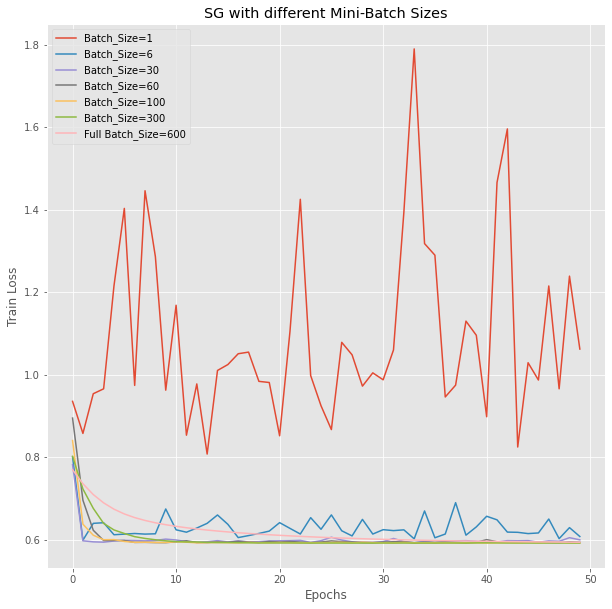

In [ ]:
plt.figure(figsize = (10,10))
tau = 1/(L)
nb_epochs = 50
lbda = 0
nb = [1,6,30,60,100,300,600]
for size in nb : 
    niter = nb_epochs*n//size
    x,cost_values = uncon.stochastic_gradient(A,tau,y,lbda,size, niter)
    if size==n:
      plt.plot(range(nb_epochs),cost_values, label=f'Full Batch_Size={str(size)}')
    else:
      plt.plot(range(nb_epochs),cost_values, label=f'Batch_Size={str(size)}')
plt.title('SG with different Mini-Batch Sizes')
plt.ylabel('Train Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

<a name='4.3'></a>
### 4.3 SVRG

In [ ]:
tau = 1/(L)
nb = 1
n = 600
nb_epochs = 30
lbda = 0
m = 10

w_output, costs = uncon.svrg(A,y,lbda,n_iter=int(nb_epochs*n/(2*m+n)),m=m)
n_iter=int(nb_epochs*n/nb)
x,cost_values = uncon.stochastic_gradient(A,tau,y,lbda,nb,n_iter)

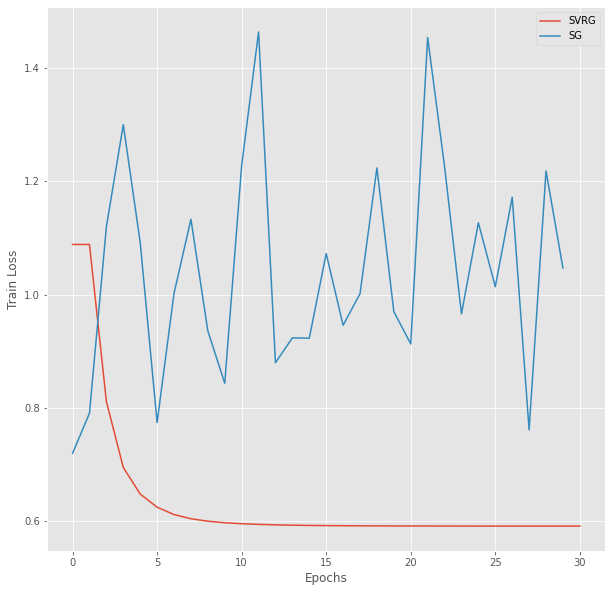

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(costs,label ='SVRG')
plt.plot(cost_values,label ='SG')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.legend()
plt.show()

SVRG reduce the variance that is inherent in the SG method (fluctuations are suppressed). As expected from the algorithm where a reference full gradient is first evaluated in the outer loop (over 2 loops) and then used to yield a variance reduced estimate of the current gradient in the inner loop.

<a name='5'></a>
# Part 5: Convexity and Constrained Optimization

In [ ]:
import constrained_optimizers._base as con

<a name='5.1'></a>
### 5.1 Conditional Gradient Descent

In [ ]:
method1, method2 = "l1", "l2"

**Convergence for different constraints l1-norms**

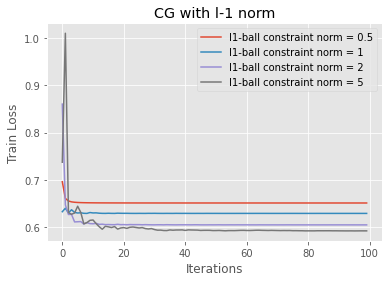

In [ ]:
niter=100
for cons in [0.5, 1, 2, 5]:
  x_1,cost_values_l1 = con.conditional_gradient(A,y,cons,niter,method1)
  plt.plot(range(niter),cost_values_l1, label=f"l1-ball constraint norm = {cons}")
plt.title('CG with l-1 norm')
plt.xlabel("Iterations")
plt.ylabel('Train Loss')
plt.legend()
plt.show()

- The results reveal that there are oscillations in the loss value for the l-1 norm constraints of 2 and 5 (the same for l-2 in next graph). This shows that CG is not a descent algorithm i.e the function value is not guaranteed to decrease at every iteration.
- CG reaches lower values of the objective function for higher values of L1 norm ball radius. This can be attributed to the radius of the ball being too small or sufficiently large as the case in the next l-2 graph. 
- The plot indicates that if CG algorithm finds an optimum near one after which expanding the constraint region (increasing the radius of the ball) has no effect and the same optimum is discovered (case of 2 and 5).



**Convergence for different constraints l2-norms**

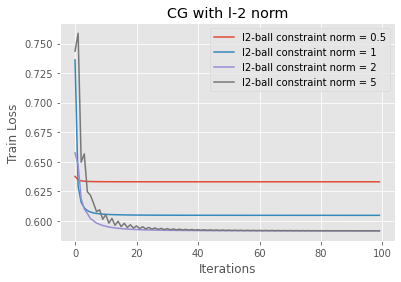

In [ ]:
niter=100
for cons in [0.5, 1, 2, 5]:
  x_l2,cost_values_l2 = con.conditional_gradient(A,y,cons,niter,method2)
  plt.plot(range(niter),cost_values_l2,label=f"l2-ball constraint norm = {cons}")
plt.title('CG with l-2 norm')
plt.xlabel("Iterations")
plt.ylabel('Train Loss')
plt.legend()
plt.show()

In the first cases (constraint norm =0.5, 1), the behaviour of CG indicates that the chosen constraint is small cannot make progress. Cases of constraints norms (2, 5) show that the problem can converge if we increase the radius of constraint.
 


**Comparison between l1/l2** 

In [ ]:
tau = 1/(L)
niter = 100
constraint = 2.
x_l1,cost_values_l1 = con.conditional_gradient(A,y,constraint,niter,method1)
x_l1,cost_values_l2 = con.conditional_gradient(A,y,constraint,niter,method2)

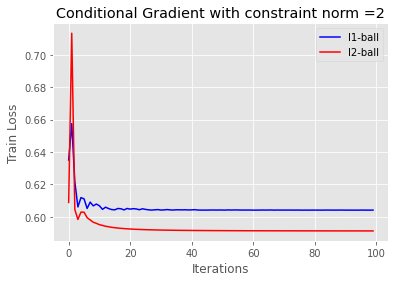

In [ ]:
plt.plot(range(niter),cost_values_l1, color = 'blue', label="l1-ball")
plt.plot(range(niter),cost_values_l2, color = 'red', label="l2-ball")
plt.title('Conditional Gradient with constraint norm =2')
plt.xlabel("Iterations")
plt.ylabel('Train Loss')
plt.legend()
plt.show()

The difference between the two curves is due to the fact that solution with L2 norm can be comparable with L1 norm solution if we increase the ball radius for the latter norm.

<a name='5.2'></a>
### 5.2 Projected Gradient Descent

In [ ]:
proj1, proj2 = "l1", "l2"

**Convergence for different constraints l1-norms**

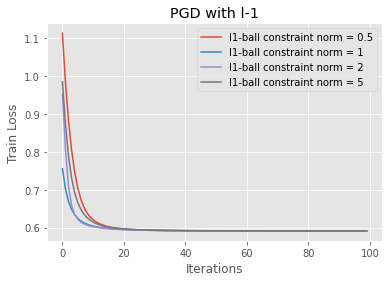

In [ ]:
niter=100
for cons in [0.5, 1, 2, 5]:
  x_1,cost_values_l1 = con.projected_gradient_descent(A,y,tau,niter,proj1,cons)
  plt.plot(range(niter),cost_values_l1, label=f"l1-ball constraint norm = {cons}")
plt.title('PGD with l-1')
plt.xlabel("Iterations")
plt.ylabel('Train Loss')
plt.legend()
plt.show()

In all constraints norm values, the behaviour of PGD indicates that the chosen constraint is convenient to progress and converge.
However, there is a stagnation for each case :  at every iteration, PGD is pushing out the vector x of the L2 norm ball which is then being projected back onto the same position leading to and being nearly the same for every iteration.

**Convergence for different constraints l2-norms**

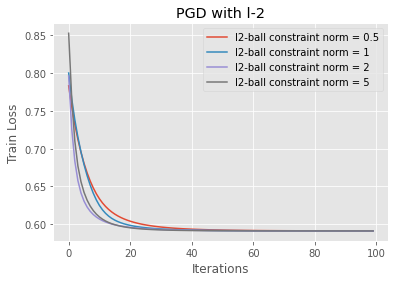

In [ ]:
niter=100
for cons in [0.5, 1, 2, 5]:
  x_l2,cost_values_l2 = con.projected_gradient_descent(A,y,tau,niter,proj2,cons)
  plt.plot(range(niter),cost_values_l2,label=f"l2-ball constraint norm = {cons}")
plt.title('PGD with l-2')
plt.xlabel("Iterations")
plt.ylabel('Train Loss')
plt.legend()
plt.show()

The cost values behavior does not change remarquably when varying constraints. For all constraints norms, the cost value decreases for 20 iterations and remains constant later on.

**Comparison between l1/l2** 

In [ ]:
tau = 1/(L)
niter = 100
constraint = 2.
x_1,cost_values_l1 = con.projected_gradient_descent(A,y,tau,niter,proj1,constraint)
x_l2,cost_values_l2 = con.projected_gradient_descent(A,y,tau,niter,proj2,constraint)

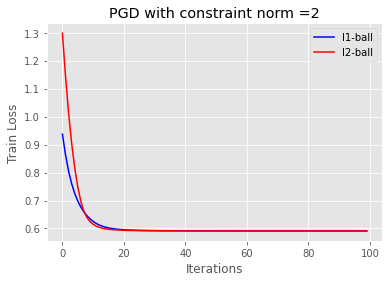

In [ ]:
plt.plot(range(niter),cost_values_l1, color = 'blue', label="l1-ball")
plt.plot(range(niter),cost_values_l2, color = 'red', label="l2-ball")
plt.title('PGD with constraint norm =2')
plt.xlabel("Iterations")
plt.ylabel('Train Loss')
plt.legend()
plt.show()

**Common Conclusion**

In all graphs, it's indicated that the function is converging to some local optimum and not necessarily the expected optimal solution.

<a name='6'></a>
# Part 6: Regularization

<a name='6.1'></a>
### 6.1 L-1 Regularization : LASSO

The most well known is the ℓ1 norm.
\begin{equation}
||x|| = \sum_{i} |x|
\end{equation}
The simplest iterative algorithm to perform the minimization is the so-called iterative soft thresholding (ISTA), aka proximal gradient.
It performs first a gradient step (forward) of the smooth part of logistic loss and then a proximal step (backward) step which account for the ℓ1 penalty and induce sparsity. This proximal step is the soft-thresholding operator.

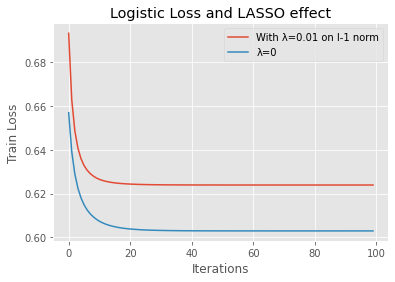

In [ ]:
tau = tau_max/2
lbda = 0.01
d = A.shape[1]
niter = 100
l_lasso,x,l = uncon.proximal_gradient(A,y,lbda,niter,tau,d)
plt.plot(range(niter),l_lasso,label =f'With λ={lbda} on l-1 norm')
plt.plot(range(niter),l,label='λ=0')
plt.title('Logistic Loss and LASSO effect')
plt.xlabel('Iterations')
plt.ylabel('Train Loss')
plt.legend()
plt.show()

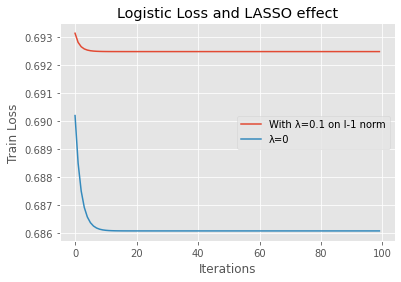

In [ ]:
lbda = 0.1
l_lasso_,x_,l_ = uncon.proximal_gradient(A,y,lbda,niter,tau,d) 
plt.plot(range(niter),l_lasso_,label =f'With λ={lbda} on l-1 norm')
plt.plot(range(niter),l_,label='λ=0')
plt.title('Logistic Loss and LASSO effect')
plt.xlabel('Iterations')
plt.ylabel('Train Loss')
plt.legend()
plt.show()

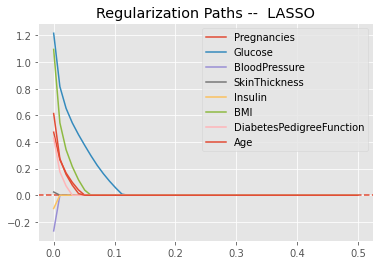

In [ ]:
lamdas = np.linspace(0,0.5,50)
niter = 100
d = A.shape[1]
x1, x2, x3, x4, x5, x6, x7, x8 = [], [], [], [], [], [], [], []
for lbda in lamdas:
    flist, x ,E_test2 = uncon.proximal_gradient(A,y,lbda,niter,tau,d)
    x1.append(x[0])
    x2.append(x[1])
    x3.append(x[2])
    x4.append(x[3])
    x5.append(x[4]) 
    x6.append(x[5]) 
    x7.append(x[6]) 
    x8.append(x[7]) 
plt.axhline (y=0,linestyle='--') 
plt.plot(lamdas,x1,label='Pregnancies')
plt.plot(lamdas,x2,label = 'Glucose')
plt.plot(lamdas,x3,label ='BloodPressure')
plt.plot(lamdas,x4,label = 'SkinThickness')
plt.plot(lamdas,x5,label = 'Insulin')
plt.plot(lamdas,x6,label = 'BMI')
plt.plot(lamdas,x7,label = 'DiabetesPedigreeFunction')
plt.plot(lamdas,x8,label = 'Age')
plt.legend()
plt.title('Regularization Paths --  LASSO')
plt.show()

<a name='6.2'></a>
### 6.2 L-2 Regularization

We replace the l-1 term in our cost function by the following quadratic term :
\begin{equation}
\lambda ||x||^2 = \lambda \sum_{i} x^2
\end{equation}

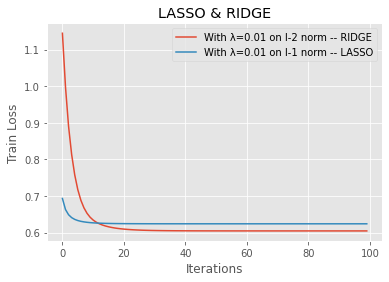

In [ ]:
#tau = 1/(L)
niter = 100
lbda = 0.01
x,cost_values,gd = uncon.gradient_descent(A,y,tau,niter,lbda) 
plt.plot(range(niter),cost_values, label=f'With λ={lbda} on l-2 norm -- RIDGE')
plt.plot(range(niter),l_lasso,label=f'With λ={lbda} on l-1 norm -- LASSO')
plt.title('LASSO & RIDGE')
plt.xlabel('Iterations')
plt.ylabel('Train Loss')
plt.legend()
plt.show()

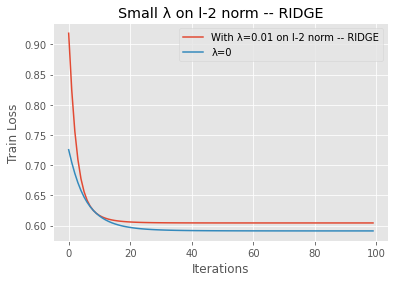

In [ ]:
niter = 100
lbda_l2 = 0.01
lbda = 0
x,cost_values,gd = uncon.gradient_descent(A,y,tau,niter,lbda)
x,cost_values_l2,gd_l2 = uncon.gradient_descent(A,y,tau,niter,lbda_l2) 
plt.plot(range(niter),cost_values_l2, label=f'With λ={lbda_l2} on l-2 norm -- RIDGE')
plt.plot(range(niter),cost_values,label=f'λ={lbda}')
plt.title('Small λ on l-2 norm -- RIDGE')
plt.xlabel('Iterations')
plt.ylabel('Train Loss')
plt.legend()
plt.show()

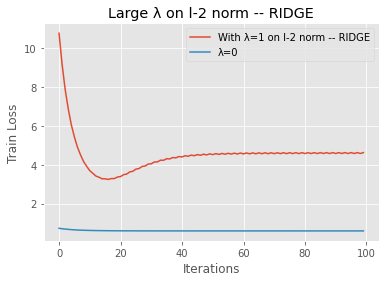

In [ ]:
niter = 100
lbda_l2 = 1
x,cost_values_l2,gd_l2 = uncon.gradient_descent(A,y,tau,niter,lbda_l2) 
plt.plot(range(niter),cost_values_l2, label=f'With λ={lbda_l2} on l-2 norm -- RIDGE')
plt.plot(range(niter),cost_values,label=f'λ={lbda}')
plt.title('Large λ on l-2 norm -- RIDGE')
plt.xlabel('Iterations')
plt.ylabel('Train Loss')
plt.legend()
plt.show()

<a name='7'></a>
# Part 7: Large-Scale and Distributed Optimization

In [ ]:
import large_scale_distributed_optimization._base as lsd

<a name='7.1'></a>
### 7.1 Randomized Block Coordinate Descent

In [ ]:
nits = 20000 #10000
d = A.shape[1]
x0 = np.ones(d)
lbda = 0.15 

In [ ]:
x1,obj1,nnz1 = lsd.randomized_block_coordinate_descent(x0,A,y,lbda,1,nits)
print('Number of coordinate(s)/it:',1)
print('Objective value:',obj1[-1])
print('Percentage nonzero coefficients:',nnz1[-1]*100/d)
print('-'*50)
x2,obj2,nnz2 = lsd.randomized_block_coordinate_descent(x0,A,y,lbda,3,nits)
print('Number of coordinate(s)/it:',3)
print('Objective value:',obj2[-1])
print('Percentage nonzero coefficients:',nnz2[-1]*100/d)
print('-'*50)
x3,obj3,nnz3 = lsd.randomized_block_coordinate_descent(x0,A,y,lbda,5,nits)
print('Number of coordinate(s)/it:',5)
print('Objective value:',obj3[-1])
print('Percentage nonzero coefficients:',nnz3[-1]*100/d)
x_l,obj_l,nnz_l = lsd.randomized_block_coordinate_descent(x0,A,y,lbda,8,nits)
print('-'*50)
print('Number of coordinate(s)/it:',8)
print('Objective value:',obj_l[-1])
print('Percentage nonzero coefficients:',nnz_l[-1]*100/d)

Number of coordinate(s)/it: 1
Objective value: 0.7256505522138254
Percentage nonzero coefficients: 100.0
--------------------------------------------------
Number of coordinate(s)/it: 3
Objective value: 0.6905081723759564
Percentage nonzero coefficients: 12.5
--------------------------------------------------
Number of coordinate(s)/it: 5
Objective value: 0.6931471805599453
Percentage nonzero coefficients: 0.0
--------------------------------------------------
Number of coordinate(s)/it: 8
Objective value: 0.6931471805599453
Percentage nonzero coefficients: 0.0


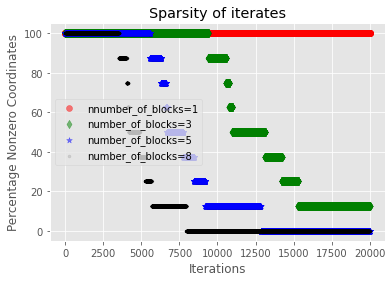

In [ ]:
plt.figure()
itnum = np.arange(nits+1)
plt.scatter(itnum,nnz1*100/d,color='red',marker='o',label='nnumber_of_blocks=1',alpha=0.5)
plt.scatter(itnum,nnz2*100/d,color='green',marker='d',label='number_of_blocks=3',alpha=0.5)
plt.scatter(itnum,nnz3*100/d,color='blue',marker='*',label='number_of_blocks=5',alpha=0.5)
plt.scatter(itnum,nnz_l*100/d,color='black',marker='.',label='number_of_blocks=8',alpha=0.1)
plt.title("Sparsity of iterates")
plt.xlabel("Iterations")
plt.ylabel("Percentage Nonzero Coordinates")
plt.legend()

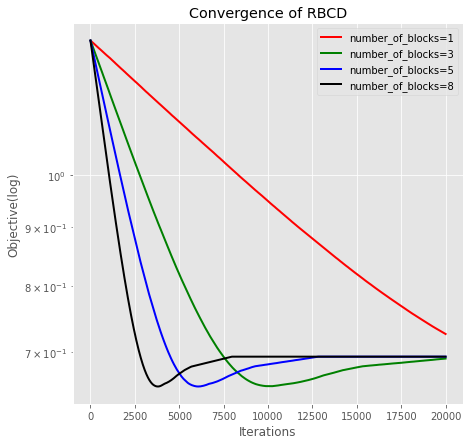

In [ ]:
plt.figure(figsize=(7, 7))
plt.semilogy(obj1, label=f'number_of_blocks={1}', color='red',lw=2)
plt.semilogy(obj2, label=f'number_of_blocks={3}', color='green',lw=2)
plt.semilogy(obj3, label=f'number_of_blocks={5}', color='blue',lw=2)
plt.semilogy(obj_l, label=f'number_of_blocks={8}', color='black',lw=2)
plt.title("Convergence of RBCD")
plt.xlabel('Iterations')
plt.ylabel('Objective(log)')
plt.legend()
plt.show()

**Utilitiy of RBCD over GD on diabetes dataset**

There is no need to apply RBCD over GD for this dataset use case. No difference ! Instead, it takes more time that GD.

<a name='7.2'></a>
### 7.2 Randomized Block Coordinate Descent + SGD

In [ ]:
nits=10000 #20000
d = A.shape[1]
x0 = np.ones(d)
lbda = 0
ns=1

In [ ]:
x4,obj4,nnz4 = lsd.randomized_block_coordinate_descent_with_stochastic_samples(x0,A,y,lbda,nb,1,nits)
print('Number of coordinate(s)/it:',1)
print('Objective value:',obj4[-1])
print('Percentage nonzero coefficients:',nnz4[-1]*100/d)
print('-'*50)
x5,obj5,nnz5 = lsd.randomized_block_coordinate_descent_with_stochastic_samples(x0,A,y,lbda,nb,3,nits)
print('Number of coordinate(s)/it:',3)
print('Objective value:',obj5[-1])
print('Percentage nonzero coefficients:',nnz5[-1]*100/d)
print('-'*50)
x6,obj6,nnz6 = lsd.randomized_block_coordinate_descent_with_stochastic_samples(x0,A,y,lbda,nb,5,nits)
print('Number of coordinate(s)/it:',5)
print('Objective value:',obj6[-1])
print('Percentage nonzero coefficients:',nnz6[-1]*100/d)
print('-'*50)
x7,obj7,nnz7 = lsd.randomized_block_coordinate_descent_with_stochastic_samples(x0,A,y,lbda,nb,8,nits)
print('Number of coordinate(s)/it:',8)
print('Objective value:',obj7[-1])
print('Percentage nonzero coefficients:',nnz7[-1]*100/d)

Number of coordinate(s)/it: 1
Objective value: 0.6992090431375368
Percentage nonzero coefficients: 100.0
--------------------------------------------------
Number of coordinate(s)/it: 3
Objective value: 0.671800293355027
Percentage nonzero coefficients: 100.0
--------------------------------------------------
Number of coordinate(s)/it: 5
Objective value: 0.6475486297775059
Percentage nonzero coefficients: 100.0
--------------------------------------------------
Number of coordinate(s)/it: 8
Objective value: 0.6258465751366277
Percentage nonzero coefficients: 100.0


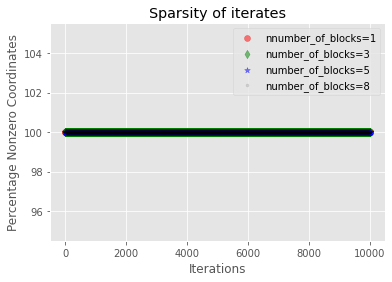

In [ ]:
plt.figure()
itnum = np.arange(nits+1)
plt.scatter(itnum,nnz4*100/d,color='red',marker='o',label='nnumber_of_blocks=1',alpha=0.5)
plt.scatter(itnum,nnz5*100/d,color='green',marker='d',label='number_of_blocks=3',alpha=0.5)
plt.scatter(itnum,nnz6*100/d,color='blue',marker='*',label='number_of_blocks=5',alpha=0.5)
plt.scatter(itnum,nnz7*100/d,color='black',marker='.',label='number_of_blocks=8',alpha=0.1)
plt.title("Sparsity of iterates")
plt.xlabel("Iterations")
plt.ylabel("Percentage Nonzero Coordinates")
plt.legend()

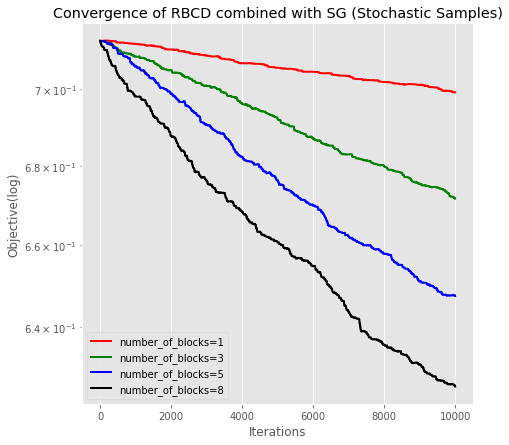

In [ ]:
plt.figure(figsize=(7, 7))
plt.semilogy(obj4, label=f'number_of_blocks={1}', color='red',lw=2)
plt.semilogy(obj5, label=f'number_of_blocks={3}', color='green',lw=2)
plt.semilogy(obj6, label=f'number_of_blocks={5}', color='blue',lw=2)
plt.semilogy(obj7, label=f'number_of_blocks={8}', color='black',lw=2)
plt.title("Convergence of RBCD combined with SG (Stochastic Samples)")
plt.xlabel('Iterations')
plt.ylabel('Objective(log)')
plt.legend()
plt.show()

RBCD featured with SG make the convergence slower than the previous version.

<a name='8'></a>
# Part 8: Advanced Topics On Gradient Descent

<a name='8.1'></a>
### 8.1 Heavy Ball

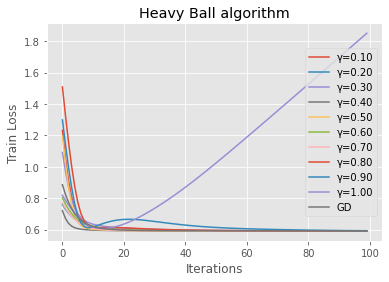

In [ ]:
tau = 1/(L)
lbda = 0
n = 600
niter = 100
change = 0
inference = False
GAMMAS = np.linspace(0.1, 1, 10)
for gamma in GAMMAS:
  x,cost_values,gamma = uncon.heavy_ball(A,y,tau,niter,lbda,gamma)
  plt.plot(range(niter),cost_values, label=f'γ={gamma:.2f}') #μ={mu:.2f}, L={l:.2f}')
x,cost_values,gd = uncon.gradient_descent(A,y,tau,niter,lbda,A1,y1,change,inference)
plt.plot(range(niter),cost_values, label=f'GD')
plt.title('Heavy Ball algorithm')
plt.xlabel('Iterations')
plt.ylabel('Train Loss')
plt.legend()
plt.show()

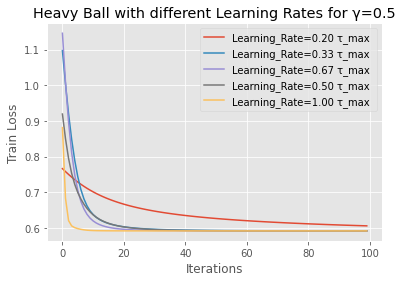

In [ ]:
tau_values =  [1/5*tau_max, 1/3 * tau_max, 2/3 * tau_max, tau_max/2, tau_max]
lbda = 0
niter = 100
gamma = 0.5
for tau in tau_values : 
    x,cost_values,gamma = uncon.heavy_ball(A,y,tau,niter,lbda,gamma)
    plt.plot(range(niter),cost_values, label=f'Learning_Rate={str("{:.2f} τ_max ".format(tau/tau_max))}')
plt.title(f'Heavy Ball with different Learning Rates for γ={gamma}')
plt.xlabel('Iterations')
plt.ylabel('Train Loss')
plt.legend()
plt.show()

<a name='8.2'></a>
### 8.2 Add Non-Convex Penalty to the loss (L-0.5 penalty) + GD

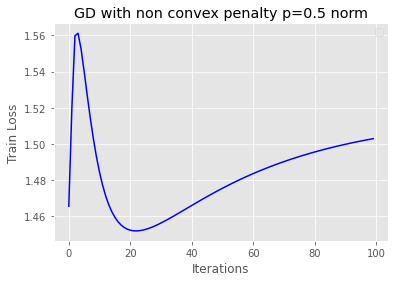

In [ ]:
tau = 1/L
niter = 100
lbda = 0.01
change = 0
p = 0.5 # p norm
inference = False
x,cost_values,_ = uncon.gradient_descent_non_convex(A,y,tau,niter,lbda,p,A1,y1,change,inference)
plt.plot(range(niter),cost_values,color = 'blue')
plt.title('GD with non convex penalty p=0.5 norm')
plt.xlabel("Iterations")
plt.ylabel('Train Loss')
plt.legend()
plt.show()